In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import string
import json
from datetime import datetime
from nltk.corpus import stopwords
import spacy
import matplotlib.pyplot as plt
import plotly
import seaborn as sns
import plotly.graph_objects as go
from spacy.lang.en.stop_words import STOP_WORDS
from gensim.parsing.preprocessing import remove_stopwords

In [2]:
nlp = spacy.load('en_core_web_sm')

In [3]:
df1 = pd.read_csv("twitter.txt", delimiter = '\t ')
df1.head()

C:\Users\chuac\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning:

Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.



,Date,Line
0,2020-04-08,"{""created_at"": ""Wed Apr 08 14:25:11 +0000 2020..."
1,2020-04-08,"{""created_at"": ""Wed Apr 08 14:25:11 +0000 2020..."
2,2020-04-08,"{""created_at"": ""Wed Apr 08 14:25:11 +0000 2020..."
3,2020-04-08,"{""created_at"": ""Wed Apr 08 14:25:11 +0000 2020..."
4,2020-04-08,"{""created_at"": ""Wed Apr 08 14:25:11 +0000 2020..."


In [4]:
tweets = []
for line in df1['Line']:
    tweets.append(json.loads(line))
    
#columns of the csv file
COLS = ['id', 'created_at', 'text']

RDB = {}
for var in COLS:
    Text = []
    for i in range(0,len(tweets)):
        Text.append(tweets[i][var])
    RDB[var]=Text

#Emoji patterns
emoji_pattern = re.compile("["
         u"\U0001F600-\U0001F64F"  # emoticons
         u"\U0001F300-\U0001F5FF"  # symbols & pictographs
         u"\U0001F680-\U0001F6FF"  # transport & map symbols
         u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
         u"\U00002702-\U000027B0"
         u"\U000024C2-\U0001F251"
         "]+", flags=re.UNICODE)

##Cleaning & Convert Twitter Data to dataframe
def TwitterCleaning(DB):
    
    HDB = pd.DataFrame(DB)
    
    #Converting Datetime
    HDB['created_at'] = pd.to_datetime(HDB['created_at'])

    #Cleaning HTML Tags
    HDB['text']=HDB['text'].apply(lambda x: re.sub('<[^>]*>','',x))

    #Cleaning URL link
    HDB['text']=HDB['text'].apply(lambda x: re.sub(r"http\S+", "", x))

    #Cleaning punctuations
    HDB['text']=HDB['text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

    #lower Case
    HDB['text']=HDB['text'].apply(lambda x: x.lower())
    
    #Remove Emoji
    HDB['text']=HDB['text'].apply(lambda x: emoji_pattern.sub(r'',x))
   
    return HDB

df = TwitterCleaning(RDB)
df.head()
df.to_csv("twitter_cleaned.csv")

# Sentiment Score

In [5]:
#TextBlob_Sentiment_Analysis
import textblob
from textblob import TextBlob

In [6]:
#polarity_Score
df['Polarity_Score'] = df['text'].apply(lambda x : TextBlob(x).sentiment.polarity)

#subjectivity score
df['Subjectivity_Score'] = df['text'].apply(lambda x : TextBlob(x).sentiment.subjectivity)

In [7]:
df.head()

,id,created_at,text,Polarity_Score,Subjectivity_Score
0,1247893254906892294,2020-04-08 14:25:11+00:00,covid19 president punishes minister for violat...,0.00,0.0000
1,1247893254441328642,2020-04-08 14:25:11+00:00,coronavirus update make all covid19 tests free...,0.40,0.8000
2,1247893254403584001,2020-04-08 14:25:11+00:00,covid19 has taken its toll on us mentally amp...,-0.05,0.1000
3,1247893254323879937,2020-04-08 14:25:11+00:00,covid19 does not know a police officer ã¢â‚¬â€...,0.00,0.0000
4,1247893253480837122,2020-04-08 14:25:11+00:00,mirandacspencer madinamerica fairmediawatch fa...,0.20,0.5125


In [9]:
#Eliminate uncessary columns
df = df.drop(['id'],axis=1)

In [10]:
df.head()

,created_at,text,Polarity_Score,Subjectivity_Score
0,2020-04-08 14:25:11+00:00,covid19 president punishes minister for violat...,0.00,0.0000
1,2020-04-08 14:25:11+00:00,coronavirus update make all covid19 tests free...,0.40,0.8000
2,2020-04-08 14:25:11+00:00,covid19 has taken its toll on us mentally amp...,-0.05,0.1000
3,2020-04-08 14:25:11+00:00,covid19 does not know a police officer ã¢â‚¬â€...,0.00,0.0000
4,2020-04-08 14:25:11+00:00,mirandacspencer madinamerica fairmediawatch fa...,0.20,0.5125


In [11]:
df.dtypes

created_at            datetime64[ns, UTC]
text                               object
Polarity_Score                    float64
Subjectivity_Score                float64
dtype: object

In [12]:
df['created_at'] = pd.to_datetime(df['created_at']).dt.date

In [13]:
df.head()

,created_at,text,Polarity_Score,Subjectivity_Score
0,2020-04-08,covid19 president punishes minister for violat...,0.00,0.0000
1,2020-04-08,coronavirus update make all covid19 tests free...,0.40,0.8000
2,2020-04-08,covid19 has taken its toll on us mentally amp...,-0.05,0.1000
3,2020-04-08,covid19 does not know a police officer ã¢â‚¬â€...,0.00,0.0000
4,2020-04-08,mirandacspencer madinamerica fairmediawatch fa...,0.20,0.5125


C:\Users\chuac\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0.5, 1.0, 'Polarity_Score')

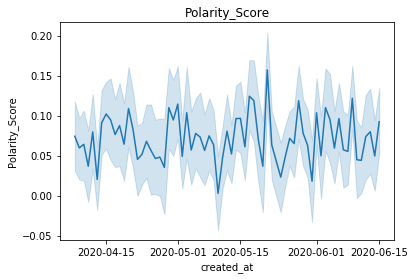

In [14]:
#Time Series Plot of polarity score
#Overall results showed tweets are neutral but slightly positive about 

sns.lineplot(x="created_at", y="Polarity_Score", data=df)
plt.title('Polarity_Score')

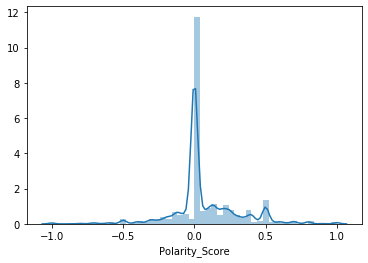

In [15]:
#Distribution Plot
ax = sns.distplot(df.Polarity_Score)

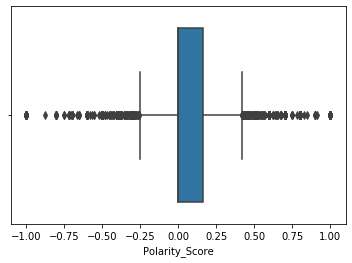

In [16]:
#BoxPlot
ax = sns.boxplot(x=df["Polarity_Score"])

In [17]:
#Overall Polarity Score As of today
df.Polarity_Score.mean()

0.07182227676895749

In [18]:
#Overall Subjectivity Score As of today
df.Subjectivity_Score.mean()

0.3104511502280314

# Word Cloud

In [19]:
import matplotlib.pyplot as plt
import wordcloud
from wordcloud import WordCloud

In [20]:
Text = df['text']

In [21]:
#Joining all text into one text variable
All_Tweets = " ".join(df['text'])

In [22]:
#Remove Stopwords
All_Tweets = remove_stopwords(All_Tweets)

In [23]:
#Remove "Covid", "Covid 19" & "Coronavirus" text because we would like to know words other than the subject
All_Tweets = All_Tweets.replace('Covid', '')
All_Tweets = All_Tweets.replace('covid', '')
All_Tweets = All_Tweets.replace('covid-19', '')
All_Tweets = All_Tweets.replace('wuhanvirus', '')
All_Tweets = All_Tweets.replace('coronavirus', '')

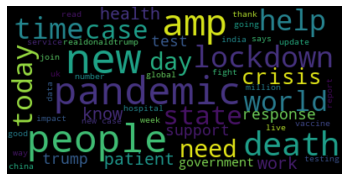

In [24]:
wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="black").generate(All_Tweets)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()